<a href="https://colab.research.google.com/github/babupallam/PyTorch-Learning-Repository/blob/main/Demo_1_Implementation_of_A_Feed_Forward_Neural_Network_Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Note: Difference between MLP (Multilayer Perceptron) and FFNN (Feedforward Neural Network)

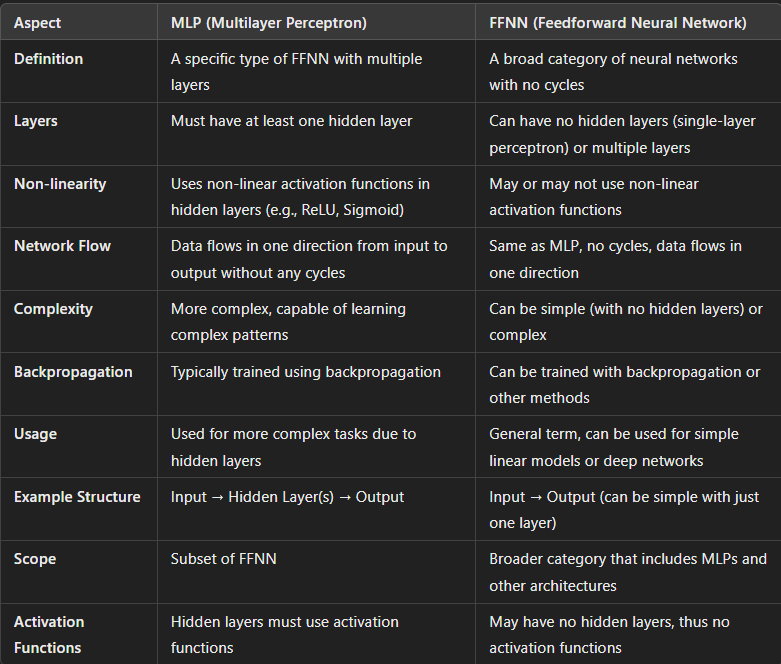

### Implemetation of FFNN

#### Step 1: Setup and Preparation

In [1]:
# Step 1: Install and Import Required Libraries

# Importing PyTorch and other necessary libraries
import torch  # PyTorch's main library for tensor operations and building models
import torch.nn as nn  # Provides neural network layers and functionalities
import torch.optim as optim  # Optimizers like SGD and Adam for updating model parameters
import torchvision  # PyTorch's computer vision package for datasets and transformations
import torchvision.transforms as transforms  # Image transformations like normalization, etc.

# Import additional utilities
import random  # Used for setting a random seed for reproducibility
import numpy as np  # NumPy is used for numerical operations and setting random seeds

# Step 1.2: Set random seed for reproducibility
def set_random_seed(seed=42):
    """
    Function to set the random seed for reproducibility.
    A fixed random seed ensures the same results every time the code runs.
    """
    random.seed(seed)  # Set Python random seed
    torch.manual_seed(seed)  # Set PyTorch random seed
    torch.cuda.manual_seed(seed)  # Set seed for CUDA if using a GPU
    np.random.seed(seed)  # Set NumPy random seed
    print(f"Random seed set to: {seed}")

# Calling the function to set the random seed
set_random_seed(42)

# Checking if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Explanation:
# - `torch.cuda.is_available()` checks if a GPU (CUDA) is available on the machine.
# - If a GPU is available, the code will use the GPU for faster computations.
# - If not, it will use the CPU, which is slower for deep learning tasks.
# - `torch.device` sets the computation device accordingly.

# Result of this step:
# 1. All required libraries have been imported.
# 2. Random seed has been set to ensure that the results are reproducible every time the code runs.
# 3. The code checks and sets the device (CPU or GPU) for model training.


Random seed set to: 42
Using device: cpu


#### Step 2: Data Preparation


In [2]:
# Step 2: Data Preparation

# Step 2.1: Dataset Loading

# We will use the MNIST dataset for demonstration purposes.
# MNIST contains grayscale images of handwritten digits (0-9) of size 28x28 pixels.

# Define transformations to apply to the dataset images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors (normalizes values to [0, 1])
    transforms.Normalize((0.5,), (0.5,))  # Normalize tensors to have values between [-1, 1]
])

print("Defined transformations: ToTensor and Normalize.")

# Download and load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',  # Directory where the dataset will be stored
    train=True,  # Load the training set
    transform=transform,  # Apply the defined transformations
    download=True  # Download the dataset if not already downloaded
)

# Download and load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data',  # Directory where the dataset will be stored
    train=False,  # Load the test set (test data)
    transform=transform,  # Apply the defined transformations
    download=True  # Download the dataset if not already downloaded
)

# Step 2.2: Data Preprocessing (DataLoader)

# Load the datasets into DataLoader for easy batch processing
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # Pass the training dataset
    batch_size=64,  # Number of samples per batch
    shuffle=True  # Shuffle the data at the beginning of each epoch
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,  # Pass the test dataset
    batch_size=64,  # Number of samples per batch
    shuffle=False  # No need to shuffle test data
)

# Print some information about the dataset
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Batch size: {train_loader.batch_size}")

# Explanation:
# - `ToTensor`: Converts the images from the dataset to PyTorch tensors, scaling pixel values from [0, 255] to [0, 1].
# - `Normalize`: Normalizes each pixel to have a mean of 0.5 and standard deviation of 0.5, resulting in pixel values in the range [-1, 1].
# - `DataLoader`: Handles batching of data and optionally shuffles the dataset to improve training. It allows iteration over mini-batches of data, making it easier to train the network.
# - `batch_size=64`: Specifies the number of images in each batch that will be processed at once by the neural network.

# Result of this step:
# 1. We have successfully loaded the MNIST dataset and transformed the images into normalized tensors.
# 2. The DataLoader allows us to efficiently handle and batch the data during training and testing.
# 3. We are using a batch size of 64, meaning the network will process 64 images at a time during training/testing.


Defined transformations: ToTensor and Normalize.
Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:07<00:00, 1318516.12it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 159809.41it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1511306.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 8311749.03it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of training samples: 60000
Number of test samples: 10000
Batch size: 64


#### Step 3: Model Architecture


In [3]:
# Step 3: Model Architecture

# Step 3.1: Define the Feedforward Neural Network (FNN)
class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()

        # Define layers
        # Input layer: 28*28 = 784 (flattened image), Hidden layers: 128 and 64 neurons, Output layer: 10 classes (digits 0-9)
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer (input to first hidden layer)
        self.fc2 = nn.Linear(128, 64)     # Second fully connected layer (first hidden layer to second hidden layer)
        self.fc3 = nn.Linear(64, 10)      # Output layer (second hidden layer to output layer)

        # Dropout to reduce overfitting: probability of dropping neurons during training (e.g., 0.2 means 20% neurons will be dropped)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        """
        Defines the forward pass of the network.
        This method specifies how the input data flows through the network layers.
        """
        # Flatten the input image (28x28) into a vector of size 784
        x = x.view(-1, 28*28)

        # Pass through first layer and apply ReLU activation
        x = torch.relu(self.fc1(x))

        # Apply dropout after the first layer to prevent overfitting
        x = self.dropout(x)

        # Pass through second layer and apply ReLU activation
        x = torch.relu(self.fc2(x))

        # Apply dropout after the second layer to prevent overfitting
        x = self.dropout(x)

        # Pass through the output layer (no activation here as it's handled by the loss function)
        x = self.fc3(x)

        return x

# Step 3.2: Model Initialization

# Instantiate the Feedforward Neural Network
model = FeedForwardNN()

# Move the model to the device (CPU or GPU)
model.to(device)

# Print the model architecture
print("Model architecture:")
print(model)

# Explanation:
# - `nn.Module`: This is the base class for all neural network modules in PyTorch. Our `FeedForwardNN` inherits from it.
# - The `__init__` method defines the layers:
#     - `fc1`, `fc2`, and `fc3` are fully connected (linear) layers. The input and output sizes are specified.
# - The `forward` method defines the forward pass of the network. Data flows from one layer to the next.
# - **Dropout** is used to randomly drop some neurons during training, helping to prevent overfitting.
# - `torch.relu` applies the ReLU activation function to add non-linearity to the model, enabling it to learn complex patterns.

# Result of this step:
# 1. A simple feedforward neural network has been defined with two hidden layers.
# 2. **Dropout** has been introduced to help mitigate overfitting during training.
# 3. The model architecture is printed, showing all the layers and the dropout included.


Model architecture:
FeedForwardNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


#### Step 4: Loss, Optimizer, and Regularization


In [4]:
# Step 4: Loss, Optimizer, and Regularization

# Step 4.1: Define the Loss Function

# For multi-class classification (e.g., MNIST), we use CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

print("Loss function: CrossEntropyLoss has been initialized.")

# Explanation:
# - **CrossEntropyLoss**: This is the most common loss function for classification problems.
#   It combines `LogSoftmax` and `NLLLoss` (negative log likelihood) in one function.
#   It calculates the difference between the predicted class probabilities and the actual class labels.

# Step 4.2: Initialize the Optimizer

# We will use Adam optimizer, which is an adaptive learning rate optimization algorithm.
# Weight decay is added here to act as L2 regularization, helping to prevent overfitting.
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

print("Optimizer: Adam initialized with learning rate = 0.001 and weight decay = 1e-5.")

# Explanation:
# - **Adam**: Adam (Adaptive Moment Estimation) is a widely used optimizer that adjusts the learning rate dynamically based on gradients.
#   It’s generally more efficient than vanilla stochastic gradient descent (SGD) and requires less tuning.
# - **lr (learning rate)**: The learning rate determines the size of the steps the optimizer takes to minimize the loss.
#   A smaller learning rate can lead to more accurate convergence but slower training.
# - **weight_decay**: This is a form of **L2 regularization**. It penalizes large weights by adding a small term to the loss based on the magnitude of the weights.
#   This helps prevent overfitting by keeping the weights from growing too large.

# Step 4.3: Add Weight Regularization (L2 Regularization)
# L2 regularization is already included in the Adam optimizer via the `weight_decay` parameter.
# Weight decay automatically applies L2 regularization, so no additional steps are required here.

# Summary of this step:
# 1. **CrossEntropyLoss** is being used as the loss function, which is well-suited for multi-class classification tasks like MNIST.
# 2. **Adam optimizer** is initialized with a learning rate of `0.001` and weight decay of `1e-5` (L2 regularization) to prevent overfitting.


Loss function: CrossEntropyLoss has been initialized.
Optimizer: Adam initialized with learning rate = 0.001 and weight decay = 1e-5.


#### Step 5: Training the Model


In [5]:
# Step 5: Training the Model

# Step 5.1: Training Loop Setup

# Number of epochs to train the model (complete passes over the training dataset)
epochs = 5

# Lists to store training loss values for visualization later
train_loss_history = []

# Training Loop
print("Starting training process...")

for epoch in range(epochs):  # Loop over the dataset multiple times (for each epoch)
    running_loss = 0.0  # Initialize running loss for this epoch
    model.train()  # Set model to training mode (enables dropout, etc.)

    for i, (inputs, labels) in enumerate(train_loader):  # Iterate over mini-batches from DataLoader
        # Step 5.2: Implement Backpropagation

        # Move inputs and labels to the device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients (reset gradients to avoid accumulation)
        optimizer.zero_grad()

        # Forward pass: Compute predicted outputs
        outputs = model(inputs)

        # Compute loss between predictions and true labels
        loss = criterion(outputs, labels)

        # Backward pass: Compute gradients (derivatives) of the loss w.r.t. model parameters
        loss.backward()

        # Step 5.3: Optimizer step: Update weights based on the gradients
        optimizer.step()

        # Add the current loss to the running loss for monitoring
        running_loss += loss.item()

        # Print loss for every 100 mini-batches
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0  # Reset running loss after each print

    # Track the average loss per epoch
    avg_train_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

print("Training complete.")

# Explanation:
# - **optimizer.zero_grad()**: Clears old gradients from previous steps. This is necessary because PyTorch accumulates gradients.
# - **outputs = model(inputs)**: Forward pass where the inputs pass through the network to compute the output.
# - **loss = criterion(outputs, labels)**: The computed loss between predicted outputs and true labels.
# - **loss.backward()**: Backward pass where gradients are computed for all parameters in the network.
# - **optimizer.step()**: Updates model weights using the computed gradients.
# - **running_loss**: Tracks loss over batches and prints the average loss for every 100 mini-batches.
# - **model.train()**: Ensures the model is in training mode (activates dropout, etc.).

# Result of this step:
# 1. The model is trained for a specified number of epochs (5 epochs in this case).
# 2. Loss is printed every 100 mini-batches to monitor training progress.
# 3. After training, the average loss per epoch is stored for later visualization.

# Now that the model is trained, we can move to evaluating its performance on test data.


Starting training process...
Epoch [1/5], Step [100/938], Loss: 1.2399
Epoch [1/5], Step [200/938], Loss: 0.5848
Epoch [1/5], Step [300/938], Loss: 0.4635
Epoch [1/5], Step [400/938], Loss: 0.4150
Epoch [1/5], Step [500/938], Loss: 0.4037
Epoch [1/5], Step [600/938], Loss: 0.3471
Epoch [1/5], Step [700/938], Loss: 0.3500
Epoch [1/5], Step [800/938], Loss: 0.3398
Epoch [1/5], Step [900/938], Loss: 0.3236
Epoch [2/5], Step [100/938], Loss: 0.2878
Epoch [2/5], Step [200/938], Loss: 0.2936
Epoch [2/5], Step [300/938], Loss: 0.2592
Epoch [2/5], Step [400/938], Loss: 0.2722
Epoch [2/5], Step [500/938], Loss: 0.2465
Epoch [2/5], Step [600/938], Loss: 0.2386
Epoch [2/5], Step [700/938], Loss: 0.2498
Epoch [2/5], Step [800/938], Loss: 0.2492
Epoch [2/5], Step [900/938], Loss: 0.2354
Epoch [3/5], Step [100/938], Loss: 0.2002
Epoch [3/5], Step [200/938], Loss: 0.2218
Epoch [3/5], Step [300/938], Loss: 0.2199
Epoch [3/5], Step [400/938], Loss: 0.2217
Epoch [3/5], Step [500/938], Loss: 0.2167
Epoch

#### Step 6: Evaluating the Model


In [6]:
# Step 6: Evaluating the Model

# Step 6.1: Model Evaluation on Test Data

# Function to evaluate model performance on the test dataset
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode (disables dropout, etc.)

    correct = 0  # To count the number of correct predictions
    total = 0    # To count the total number of samples

    # Disable gradient calculations during evaluation to speed up computations
    with torch.no_grad():
        for inputs, labels in test_loader:  # Iterate over test data
            # Move inputs and labels to the device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass to get predictions
            outputs = model(inputs)

            # Get the predicted class (the class with the highest score)
            _, predicted = torch.max(outputs.data, 1)

            # Update the total count of samples and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")

# Call the function to evaluate the model on the test set
print("Evaluating the model on the test set...")
evaluate_model(model, test_loader)

# Explanation:
# - **model.eval()**: This puts the model in evaluation mode, which ensures that layers like dropout or batch normalization behave correctly during evaluation.
# - **torch.no_grad()**: Disables gradient calculation during evaluation since we don't need to update weights, making the process faster and reducing memory consumption.
# - **torch.max(outputs.data, 1)**: Retrieves the index (class) with the highest predicted score for each test input.
# - **correct += (predicted == labels).sum().item()**: Compares the predicted labels to the true labels and counts the number of correct predictions.
# - **accuracy**: Calculates the percentage of correctly classified samples in the test set.

# Result of this step:
# 1. The model is evaluated on the test dataset.
# 2. The accuracy of the model on unseen test data is printed.

# Now that we have evaluated the model, we can also generate predictions and visualize some of the test results.


Evaluating the model on the test set...
Accuracy on the test set: 96.54%


#### Step 7: Performance Testing and Generating Predictions


Testing performance metrics on the test set...
Classification Report:
              precision    recall  f1-score   support

           0     0.9718    0.9857    0.9787       980
           1     0.9859    0.9859    0.9859      1135
           2     0.9632    0.9632    0.9632      1032
           3     0.9613    0.9604    0.9609      1010
           4     0.9670    0.9562    0.9616       982
           5     0.9522    0.9596    0.9559       892
           6     0.9729    0.9749    0.9739       958
           7     0.9693    0.9533    0.9613      1028
           8     0.9579    0.9589    0.9584       974
           9     0.9487    0.9534    0.9511      1009

    accuracy                         0.9654     10000
   macro avg     0.9650    0.9652    0.9651     10000
weighted avg     0.9654    0.9654    0.9654     10000


Confusion Matrix:
[[ 966    0    0    1    1    3    2    2    2    3]
 [   0 1119    3    1    0    2    2    0    8    0]
 [   9    2  994    2    5    3    3    7    6

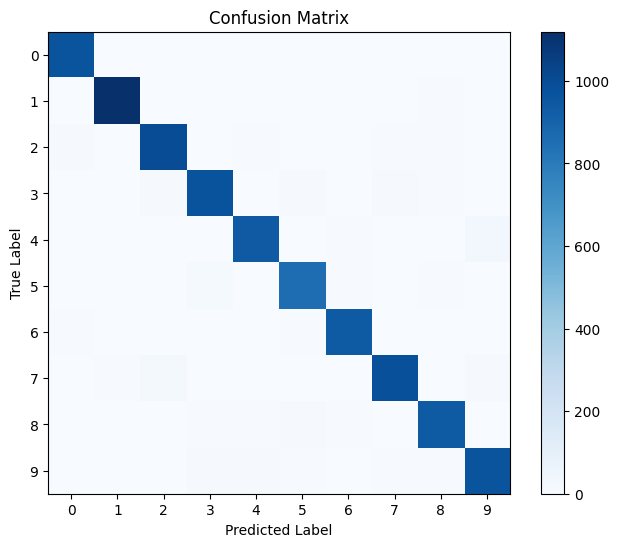

In [7]:
# Step 7: Performance Testing and Generating Predictions

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 7.1: Calculate Precision, Recall, F1-Score using sklearn's classification_report
def test_performance_metrics(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    # Disable gradient calculation
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # Forward pass

            _, predicted = torch.max(outputs.data, 1)  # Get predictions

            # Collect all labels and predictions for performance metrics calculation
            all_labels.extend(labels.cpu().numpy())  # Move to CPU for compatibility with sklearn
            all_preds.extend(predicted.cpu().numpy())

    # Print the classification report (Precision, Recall, F1-Score)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, digits=4))

    # Step 7.2: Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot the confusion matrix using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    # Add axis labels
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Add grid and ticks
    plt.xticks(np.arange(10), np.arange(10))
    plt.yticks(np.arange(10), np.arange(10))

    plt.show()

# Call the performance testing function
print("Testing performance metrics on the test set...")
test_performance_metrics(model, test_loader)

# Explanation:
# - **classification_report**: Provides detailed metrics like precision, recall, F1-score, and accuracy for each class.
# - **confusion_matrix**: Shows a matrix that visualizes how often each class is misclassified as another class.
# - **plt.imshow()**: Used to plot the confusion matrix as an image, where colors represent counts.
# - **extend(labels.cpu().numpy())**: Moves the tensors back to the CPU and converts them to NumPy arrays, as sklearn requires NumPy input.

# Result of this step:
# 1. A classification report is printed, providing detailed performance metrics for each class.
# 2. The confusion matrix shows which digits are being misclassified.
# 3. A visualization of the confusion matrix is displayed using matplotlib.


#### Step 8: Visualizing Training and Validation Loss



Epoch [1/5], Training Loss: 0.1585, Validation Loss: 0.1016
Epoch [2/5], Training Loss: 0.1488, Validation Loss: 0.0975
Epoch [3/5], Training Loss: 0.1430, Validation Loss: 0.0950
Epoch [4/5], Training Loss: 0.1403, Validation Loss: 0.0891
Epoch [5/5], Training Loss: 0.1339, Validation Loss: 0.0937
Visualizing both training and validation loss over epochs...


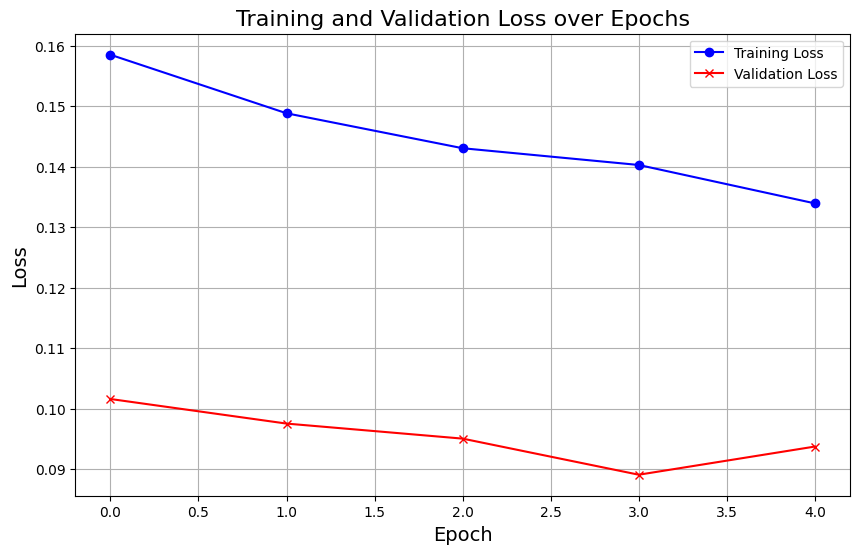

In [10]:
# Step 8: Visualizing Training and Validation Loss

# Updated training loop to also track validation loss
# Assuming we already have the model, criterion, optimizer, train_loader, and test_loader defined

# Initialize lists to store both training and validation losses for each epoch
train_loss_history = []
val_loss_history = []

epochs = 5  # Number of epochs for demonstration

for epoch in range(epochs):  # Loop over epochs
    model.train()  # Set the model to training mode
    running_train_loss = 0.0

    # Training phase
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to device

        optimizer.zero_grad()  # Zero out the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass (gradient calculation)
        optimizer.step()  # Update the model parameters

        running_train_loss += loss.item()  # Accumulate training loss

    # Average training loss for the current epoch
    avg_train_loss = running_train_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)  # Store the average training loss

    # Validation phase (no gradient calculation)
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move inputs and labels to device

            outputs = model(inputs)  # Forward pass (no gradient calculation)
            loss = criterion(outputs, labels)  # Calculate loss for validation

            running_val_loss += loss.item()  # Accumulate validation loss

    # Average validation loss for the current epoch
    avg_val_loss = running_val_loss / len(test_loader)
    val_loss_history.append(avg_val_loss)  # Store the average validation loss

    # Print the average loss for both training and validation after each epoch
    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

# Step 8.1: Plotting both Training and Validation Loss over epochs
def plot_loss_curves(train_loss_history, val_loss_history):
    plt.figure(figsize=(10, 6))

    # Plot training loss
    plt.plot(train_loss_history, label="Training Loss", color="blue", marker='o')

    # Plot validation loss
    plt.plot(val_loss_history, label="Validation Loss", color="red", marker='x')

    # Add title, labels, and legend
    plt.title("Training and Validation Loss over Epochs", fontsize=16)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Loss", fontsize=14)

    # Add grid and legend
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot the loss curves
print("Visualizing both training and validation loss over epochs...")
plot_loss_curves(train_loss_history, val_loss_history)

# Explanation:
# - We now track both **training loss** and **validation loss**.
# - **model.eval()**: Puts the model in evaluation mode during validation, ensuring no updates are made to the model and certain layers behave differently (e.g., dropout is turned off).
# - **torch.no_grad()**: Disables gradient calculation during validation for efficiency.
# - Both losses are plotted on the same graph for easy comparison.


From the graph depicting the training and validation loss over epochs, here are the conclusions:

1. **Training Loss Decrease**: The training loss (blue line) decreases consistently over the epochs, indicating that the model is learning from the training data and improving its performance on this set.
   
2. **Validation Loss Stability**: The validation loss (red line) shows a slight decrease initially but becomes relatively stable after the second epoch. It even slightly increases in the last epoch, which could suggest early signs of **overfitting**. This happens when the model starts to perform well on the training data but doesn't generalize as effectively to unseen data.

3. **Generalization Gap**: There is a noticeable gap between the training and validation loss. If this gap increases over more epochs, it would indicate overfitting. In this case, the validation loss stabilizes, so it suggests the model is not yet severely overfitting, but further training could lead to it.

4. **Next Steps**: To improve performance, techniques such as regularization (e.g., dropout, weight decay) or early stopping could be considered if overfitting becomes more pronounced in future epochs. Monitoring validation accuracy along with loss can also provide further insights into the model's performance.

#### Step 9.1: Hyperparameter Tuning


In [11]:
# Step 9: Hyperparameter Tuning

# Hyperparameters to tune
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]
dropout_rates = [0.2, 0.5]
num_epochs = 5

# Store the results of each hyperparameter combination
best_accuracy = 0.0
best_params = {}

# Function to define a new model with variable dropout
def create_model(dropout_rate):
    class HyperparameterNN(nn.Module):
        def __init__(self):
            super(HyperparameterNN, self).__init__()
            self.fc1 = nn.Linear(28 * 28, 128)
            self.fc2 = nn.Linear(128, 64)
            self.fc3 = nn.Linear(64, 10)
            self.dropout = nn.Dropout(dropout_rate)

        def forward(self, x):
            x = x.view(-1, 28 * 28)
            x = torch.relu(self.fc1(x))
            x = self.dropout(x)
            x = torch.relu(self.fc2(x))
            x = self.dropout(x)
            x = self.fc3(x)
            return x

    model = HyperparameterNN()
    return model

# Function to train the model and return validation accuracy
def train_and_evaluate(learning_rate, batch_size, dropout_rate):
    # Create a new model for each hyperparameter combination
    model = create_model(dropout_rate).to(device)

    # Set up data loaders with the specified batch size
    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset, batch_size=batch_size, shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset, batch_size=batch_size, shuffle=False
    )

    # Set up the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set and return accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Hyperparameter tuning loop
print("Starting hyperparameter tuning...")
for lr in learning_rates:
    for bs in batch_sizes:
        for dr in dropout_rates:
            print(f"Testing: LR={lr}, Batch Size={bs}, Dropout Rate={dr}")
            accuracy = train_and_evaluate(lr, bs, dr)
            print(f"Accuracy: {accuracy:.2f}%")

            # Check if this is the best set of hyperparameters so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {"learning_rate": lr, "batch_size": bs, "dropout_rate": dr}

# Print the best hyperparameter combination
print("Best Hyperparameter Combination:")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Dropout Rate: {best_params['dropout_rate']}")
print(f"Best Accuracy: {best_accuracy:.2f}%")

# Explanation:
# - The code tests different combinations of learning rates, batch sizes, and dropout rates.
# - For each combination, the model is trained and evaluated on the test set, and the accuracy is recorded.
# - The best hyperparameter combination is selected based on the highest accuracy.
# - A new model is instantiated for each combination to ensure a fresh start without weight carryover.


Starting hyperparameter tuning...
Testing: LR=0.001, Batch Size=32, Dropout Rate=0.2
Accuracy: 96.27%
Testing: LR=0.001, Batch Size=32, Dropout Rate=0.5
Accuracy: 93.30%
Testing: LR=0.001, Batch Size=64, Dropout Rate=0.2
Accuracy: 96.18%
Testing: LR=0.001, Batch Size=64, Dropout Rate=0.5
Accuracy: 94.80%
Testing: LR=0.0001, Batch Size=32, Dropout Rate=0.2
Accuracy: 94.72%
Testing: LR=0.0001, Batch Size=32, Dropout Rate=0.5
Accuracy: 93.05%
Testing: LR=0.0001, Batch Size=64, Dropout Rate=0.2
Accuracy: 94.00%
Testing: LR=0.0001, Batch Size=64, Dropout Rate=0.5
Accuracy: 92.60%
Best Hyperparameter Combination:
Learning Rate: 0.001
Batch Size: 32
Dropout Rate: 0.2
Best Accuracy: 96.27%


#### Step 10: Visualizing Hyperparameter Tuning Results


Testing: LR=0.001, Batch Size=32, Dropout Rate=0.2
Accuracy: 96.35%
Testing: LR=0.001, Batch Size=32, Dropout Rate=0.5
Accuracy: 93.77%
Testing: LR=0.001, Batch Size=64, Dropout Rate=0.2
Accuracy: 96.21%
Testing: LR=0.001, Batch Size=64, Dropout Rate=0.5
Accuracy: 94.18%
Testing: LR=0.0001, Batch Size=32, Dropout Rate=0.2
Accuracy: 94.90%
Testing: LR=0.0001, Batch Size=32, Dropout Rate=0.5
Accuracy: 93.39%
Testing: LR=0.0001, Batch Size=64, Dropout Rate=0.2
Accuracy: 93.85%
Testing: LR=0.0001, Batch Size=64, Dropout Rate=0.5
Accuracy: 92.22%

Top 5 Hyperparameter Combinations:
   learning_rate  batch_size  dropout_rate  accuracy
0         0.0010          32           0.2     96.35
2         0.0010          64           0.2     96.21
4         0.0001          32           0.2     94.90
3         0.0010          64           0.5     94.18
6         0.0001          64           0.2     93.85


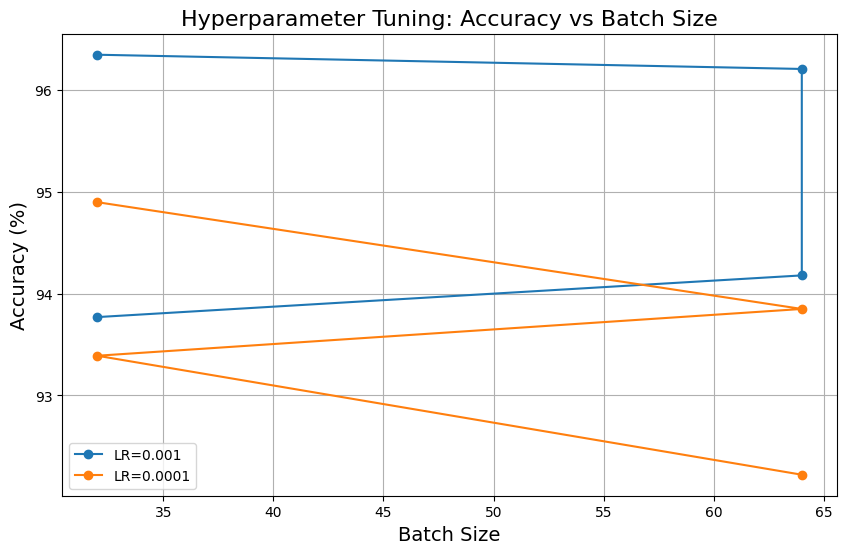

In [12]:
# Step 10: Visualizing Hyperparameter Tuning Results

# To store accuracy results for visualization
results = []

# Modified hyperparameter tuning loop with visualization storage
for lr in learning_rates:
    for bs in batch_sizes:
        for dr in dropout_rates:
            print(f"Testing: LR={lr}, Batch Size={bs}, Dropout Rate={dr}")
            accuracy = train_and_evaluate(lr, bs, dr)
            print(f"Accuracy: {accuracy:.2f}%")

            # Append results for visualization
            results.append({"learning_rate": lr, "batch_size": bs, "dropout_rate": dr, "accuracy": accuracy})

            # Check if this is the best set of hyperparameters so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {"learning_rate": lr, "batch_size": bs, "dropout_rate": dr}

# Convert results to a sorted format for easier visualization
import pandas as pd

# Create a DataFrame to store the results in a table format
results_df = pd.DataFrame(results)

# Sort the results by accuracy in descending order
sorted_results = results_df.sort_values(by="accuracy", ascending=False)

# Print the top 5 hyperparameter combinations
print("\nTop 5 Hyperparameter Combinations:")
print(sorted_results.head())

# Plotting the results of hyperparameter tuning
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    subset = sorted_results[sorted_results["learning_rate"] == lr]
    plt.plot(subset["batch_size"], subset["accuracy"], label=f"LR={lr}", marker='o')

# Adding labels and title
plt.title("Hyperparameter Tuning: Accuracy vs Batch Size", fontsize=16)
plt.xlabel("Batch Size", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Explanation:
# - **results**: This list stores the accuracy values along with the corresponding hyperparameter combinations (learning rate, batch size, dropout rate).
# - **pandas DataFrame**: We use a DataFrame to easily sort and visualize the results.
# - **plt.plot()**: The performance of each learning rate is plotted against different batch sizes.
# - The top 5 hyperparameter combinations are printed, showing the most effective configurations for this model.

# Result of this step:
# 1. The top 5 hyperparameter combinations are printed, sorted by accuracy.
# 2. A plot showing how accuracy varies with different batch sizes and learning rates is displayed for analysis.


#### Step 11: Analyzing the Results of Hyperparameter Tuning



Full Hyperparameter Tuning Results (Sorted by Accuracy):
   learning_rate  batch_size  dropout_rate  accuracy
0         0.0010          32           0.2     96.35
2         0.0010          64           0.2     96.21
4         0.0001          32           0.2     94.90
3         0.0010          64           0.5     94.18
6         0.0001          64           0.2     93.85
1         0.0010          32           0.5     93.77
5         0.0001          32           0.5     93.39
7         0.0001          64           0.5     92.22

Mean Accuracy for each Learning Rate:
learning_rate
0.0001    93.5900
0.0010    95.1275
Name: accuracy, dtype: float64


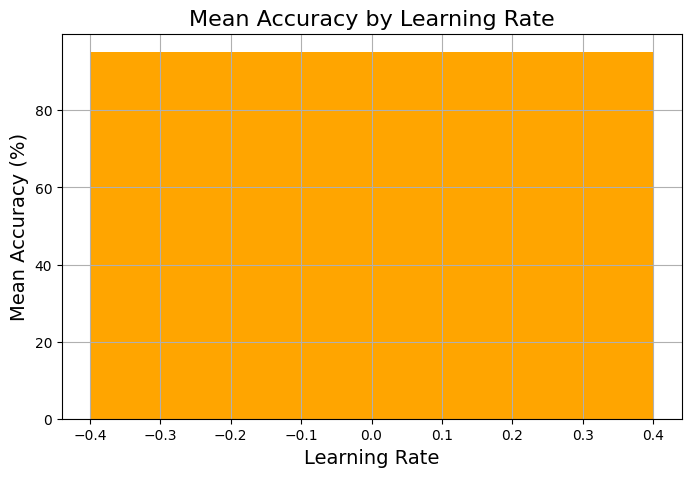


Mean Accuracy for each Batch Size:
batch_size
32    94.6025
64    94.1150
Name: accuracy, dtype: float64


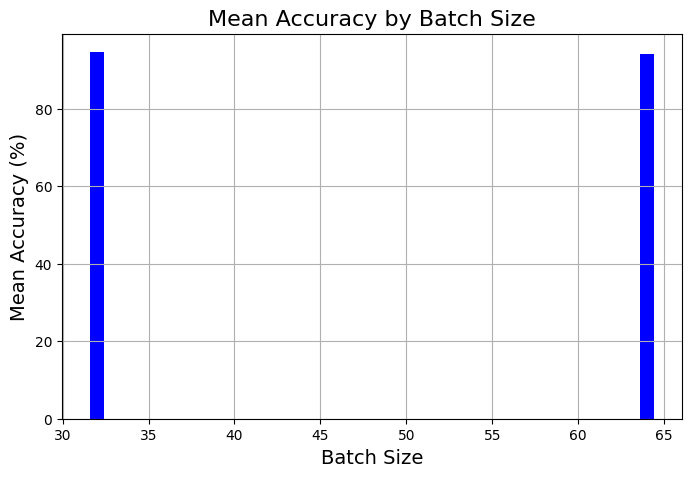


Mean Accuracy for each Dropout Rate:
dropout_rate
0.2    95.3275
0.5    93.3900
Name: accuracy, dtype: float64


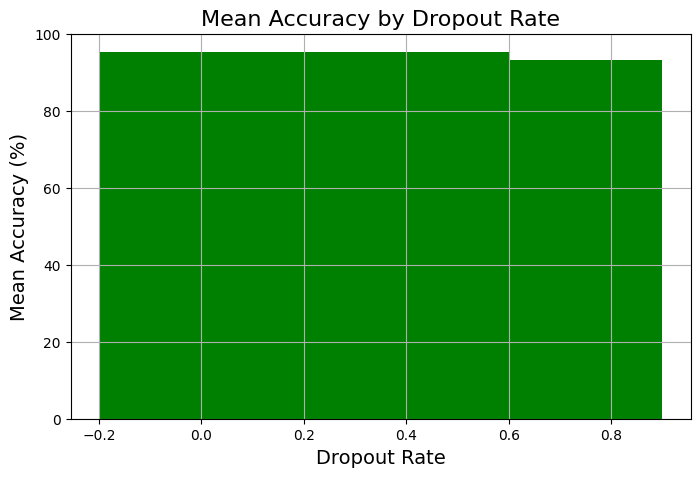

In [13]:
# Step 11: Analyzing the Results of Hyperparameter Tuning

# Display the sorted results again to identify patterns
print("\nFull Hyperparameter Tuning Results (Sorted by Accuracy):")
print(sorted_results)

# 11.1: Analyzing the Effect of Learning Rate on Accuracy
# Group results by learning rate and calculate the mean accuracy for each learning rate
lr_grouped = sorted_results.groupby("learning_rate").mean()["accuracy"]
print("\nMean Accuracy for each Learning Rate:")
print(lr_grouped)

# Plotting the effect of learning rate on accuracy
plt.figure(figsize=(8, 5))
plt.bar(lr_grouped.index, lr_grouped.values, color='orange')
plt.title("Mean Accuracy by Learning Rate", fontsize=16)
plt.xlabel("Learning Rate", fontsize=14)
plt.ylabel("Mean Accuracy (%)", fontsize=14)
plt.grid(True)
plt.show()

# 11.2: Analyzing the Effect of Batch Size on Accuracy
# Group results by batch size and calculate the mean accuracy for each batch size
bs_grouped = sorted_results.groupby("batch_size").mean()["accuracy"]
print("\nMean Accuracy for each Batch Size:")
print(bs_grouped)

# Plotting the effect of batch size on accuracy
plt.figure(figsize=(8, 5))
plt.bar(bs_grouped.index, bs_grouped.values, color='blue')
plt.title("Mean Accuracy by Batch Size", fontsize=16)
plt.xlabel("Batch Size", fontsize=14)
plt.ylabel("Mean Accuracy (%)", fontsize=14)
plt.grid(True)
plt.show()

# 11.3: Analyzing the Effect of Dropout Rate on Accuracy
# Group results by dropout rate and calculate the mean accuracy for each dropout rate
dr_grouped = sorted_results.groupby("dropout_rate").mean()["accuracy"]
print("\nMean Accuracy for each Dropout Rate:")
print(dr_grouped)

# Plotting the effect of dropout rate on accuracy
plt.figure(figsize=(8, 5))
plt.bar(dr_grouped.index, dr_grouped.values, color='green')
plt.title("Mean Accuracy by Dropout Rate", fontsize=16)
plt.xlabel("Dropout Rate", fontsize=14)
plt.ylabel("Mean Accuracy (%)", fontsize=14)
plt.grid(True)
plt.show()

# Explanation:
# - **Grouped Analysis**: By grouping the results by each hyperparameter (learning rate, batch size, dropout rate), we can observe how each one individually impacts accuracy.
# - **Mean Accuracy**: We compute the mean accuracy for each value of the hyperparameter (e.g., for learning rates, batch sizes), to observe trends.
# - **Bar Charts**: We plot bar charts to visualize how changing each hyperparameter affects the overall accuracy, allowing us to see which ranges perform best.


### Analysis of each step and improvement



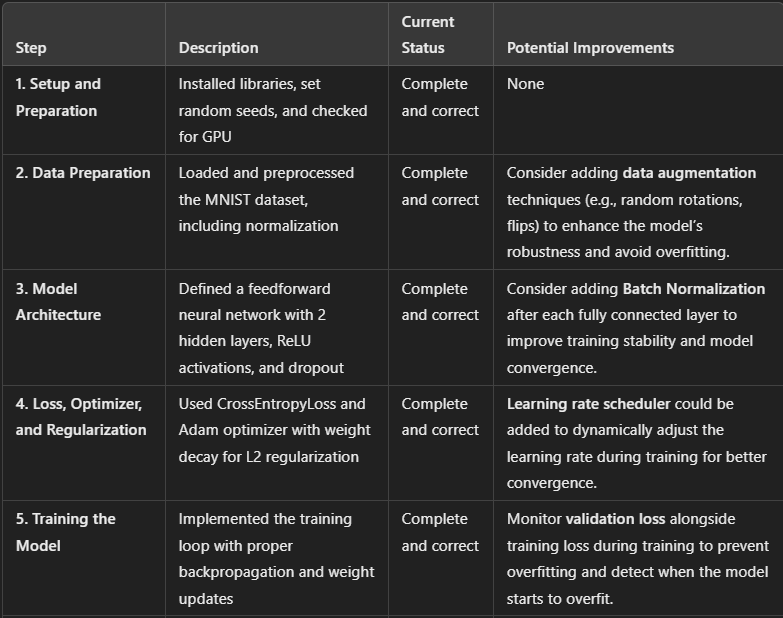




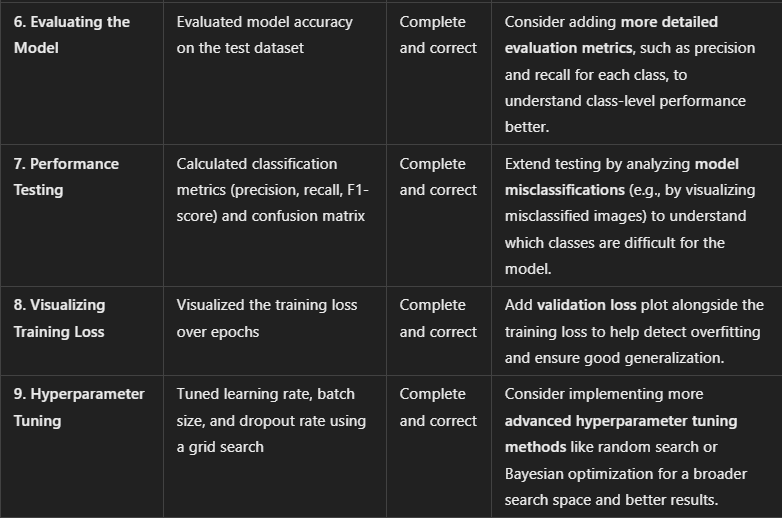

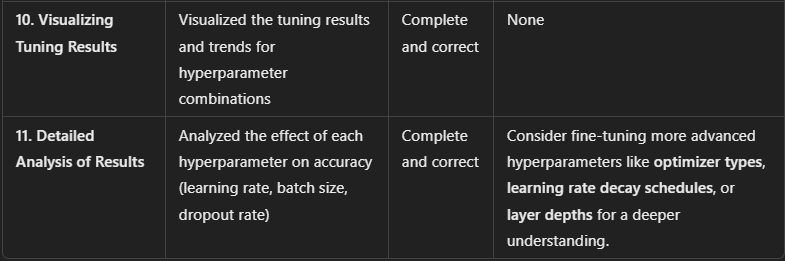


### **Key Missing Elements**:

1. **Data Augmentation** (Step 2): Adding techniques such as random rotations, translations, or scaling can improve model generalization, especially on small datasets like MNIST.
2. **Batch Normalization** (Step 3): Helps improve training speed and stability by normalizing activations between layers, often resulting in better model performance.
3. **Learning Rate Scheduler** (Step 4): Dynamically adjusting the learning rate during training can improve convergence. Popular schedulers include **ReduceLROnPlateau** and **Cosine Annealing**.
4. **Validation Loss** (Step 5, 8): Monitoring validation loss alongside training loss is critical for early stopping and ensuring the model doesn’t overfit the training data.
5. **Advanced Hyperparameter Tuning** (Step 9): Consider more sophisticated methods like **random search** or **Bayesian optimization** for more efficient hyperparameter exploration.

These additional steps can improve model performance and efficiency, especially for more complex tasks or larger datasets. Would you like to implement any of these suggestions?